<a href="https://colab.research.google.com/github/Tadamiao/Forage_AI/blob/main/Classification_AI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv("bankinfo.csv", sep=';')

# Add ID column
df['id'] = df.index

# Preprocess the data
X = df.drop(["id", "y"], axis=1)  # Input features
Y = df["y"]  # Target variable

# Handle missing or invalid values in the target variable
Y.fillna("unknown", inplace=True)  # Fill missing values with a placeholder
valid_labels = ["yes", "no"]  # Valid labels for the target variable
Y = Y.apply(lambda x: x if x in valid_labels else "unknown")  # Map invalid labels to the placeholder

# Encode the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Encode categorical variables in input features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.40, random_state=987)

In [32]:
# Build the classification model
model = Sequential()
model.add(Dense(64, input_dim=X_encoded.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, Y_train, epochs=65, verbose=1, validation_split=0.4)
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to binary labels
predictions = (predictions > 0.3).astype(int)
# Create output DataFrame with ID and 'y' values
output = pd.DataFrame({'id': df['id'], 'y': Y})

# Save the output to a CSV file
output.to_csv("output.csv", index=False)


# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

Epoch 1/65
464/464 [==============================] - 2s 4ms/step - loss: 1.9155 - accuracy: 0.8589 - val_loss: 0.3138 - val_accuracy: 0.8795
Epoch 2/65
464/464 [==============================] - 1s 3ms/step - loss: 0.5875 - accuracy: 0.8770 - val_loss: 0.3703 - val_accuracy: 0.8608
Epoch 3/65
464/464 [==============================] - 2s 3ms/step - loss: 0.5180 - accuracy: 0.8802 - val_loss: 2.5398 - val_accuracy: 0.8855
Epoch 4/65
464/464 [==============================] - 1s 3ms/step - loss: 0.7716 - accuracy: 0.8770 - val_loss: 0.8972 - val_accuracy: 0.9035
Epoch 5/65
464/464 [==============================] - 1s 3ms/step - loss: 0.6384 - accuracy: 0.8810 - val_loss: 1.1674 - val_accuracy: 0.7033
Epoch 6/65
464/464 [==============================] - 1s 2ms/step - loss: 0.6614 - accuracy: 0.8826 - val_loss: 0.4085 - val_accuracy: 0.8994
Epoch 7/65
464/464 [==============================] - 1s 2ms/step - loss: 0.6674 - accuracy: 0.8818 - val_loss: 0.2747 - val_accuracy: 0.9042
Epoch 

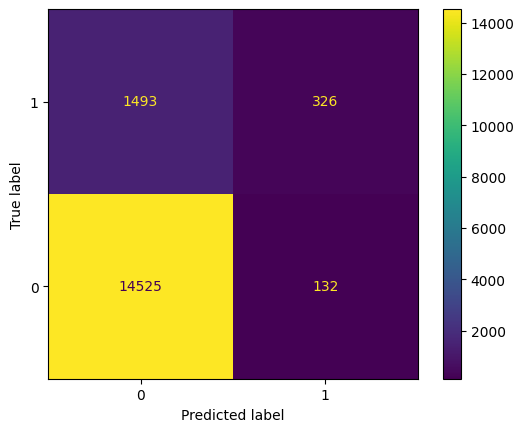

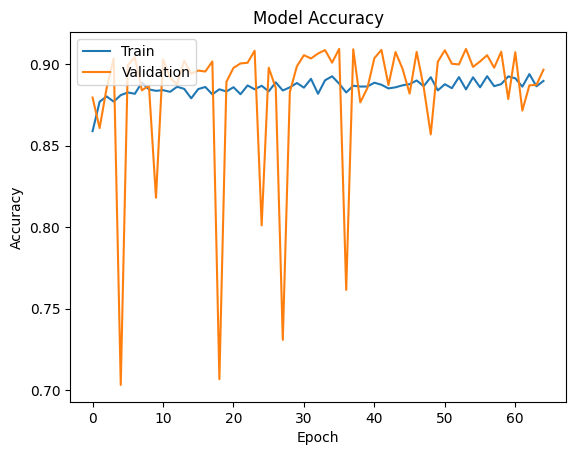

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cfm = confusion_matrix(Y_test, predictions)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.gca().invert_yaxis()
plt.show()

# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
